#### Мажник Павел, 792

### ДЗ 3. Сравнение оценок. Эффективные оценки.
#### Задача 1. 
Сгенерируйте $M=100$ выборок $X_1, ...,
    X_{1000}$ из равномерного распределения на отрезке $[0, \theta]$ (возьмите три
    произвольных положительных значения $\theta$). Для каждой выборки
    $X_1,\ldots,X_n$ для всех $n \leqslant 1000$ посчитайте оценки параметра
    $\theta$ из теоретической задачи: $2 \overline{X}, (n + 1) X_{(1)}, X_{(1)} +
    X_{(n)}, \frac {n + 1} {n} X_{(n)}$. Посчитайте для всех полученых оценок
    $\hat\theta$ квадратичную функцию потерь $(\hat\theta-\theta)^2$ и для каждого
    фиксированного $n$ усредните по выборкам. Для каждого из трех значений $\theta$
    постройте графики усредненных функций потерь в зависимости от $n$.

In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

M = 100
N = 1000

In [53]:
def estimates(theta):
    # Сгенерируем выборки:
    samples = uniform.rvs(size=(M, N), scale=theta)
    
    # Для всех n <= N посчитаем оценки параметра theta из теоретической задачи:
    est = np.zeros((4, N, M))
    for n in range(1, N + 1):
        mean = np.array([np.mean(samples[m][:n]) for m in range(M)])
        est[0][n - 1] = 2 * mean
        est[1][n - 1] = np.array([(n + 1) * samples[m][:n].min() for m in range(M)])
        est[2][n - 1] = np.array([samples[m][:n].min() + samples[m][:n].max() for m in range(M)])
        est[3][n - 1] = np.array([(n + 1) * samples[m][:n].max() / n for m in range(M)])
    return est

Сгенерируем $M = 100$ выборок с $\theta = 2$ и посчитаем оценки.

In [54]:
theta = 2
ests = estimates(theta)

In [55]:
def makePlot(ests, theta, should_exclude=False):
    titles = [r'$2\overline{X}$', r'$(n + 1)X_{(1)}$', r'$X_{(1)} + X_{(n)}$', r'$\frac{n + 1}{n}X_{(n)}$']
    colors = ['b', 'y', 'g', 'r']
    plt.figure(figsize=(10, 5))
    for i, est_i in enumerate(ests):
        if i != 1 or not should_exclude:
            plt.plot(range(1, N + 1), [np.mean((est_i[n] - theta) ** 2) for n in range(N)], 
                     colors[i], label=titles[i])

    if should_exclude:
        plt.ylim(0, 0.05)
    plt.xlabel(r'$n$')
    plt.ylabel(r'$\overline{(\hat \theta_n - \theta)^2}$')
    plt.title(r"График зависимости функции потерь параметра $\theta$ = {} от размера выборки".format(theta))
    plt.legend()
    plt.show()

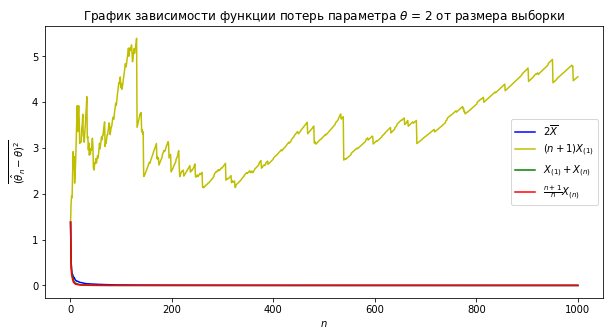

In [56]:
makePlot(ests, theta)

Из графика видно, что оценка $(n + 1)X_{(1)}$ сильно отличаeтся от истинного значения. Это связано с тем, что её функция риска стремится к $\theta^2$, в отличие от остальных, которые стремятся к нулю. Поэтому на графике видим колебания около $\theta^2$.  
Исключим её и построим еще один график в увеличенном масштабе.

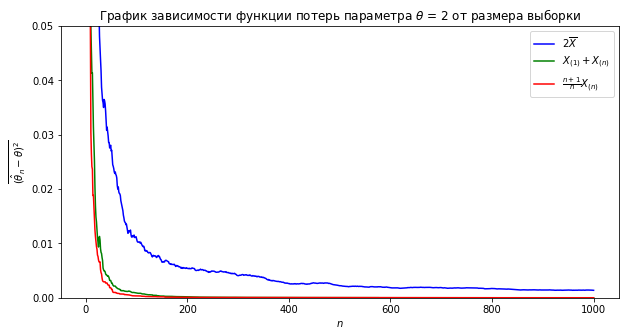

In [57]:
makePlot(ests, theta, True)

Проведем построения графиков для $\theta = 5$ и $\theta = 10.$

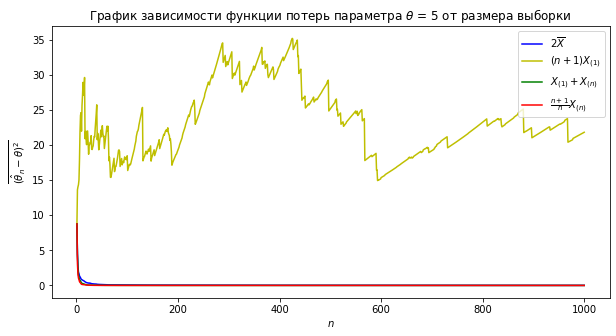

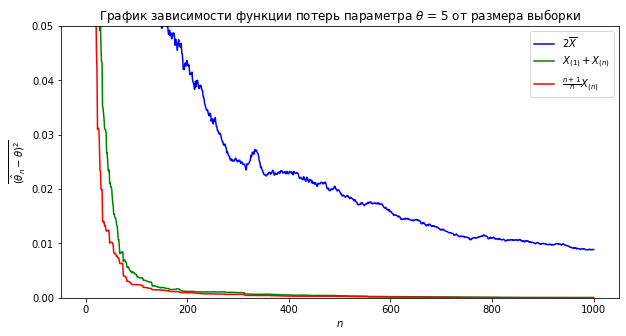

In [58]:
theta = 5
ests = estimates(theta)
makePlot(ests, theta)
makePlot(ests, theta, True)

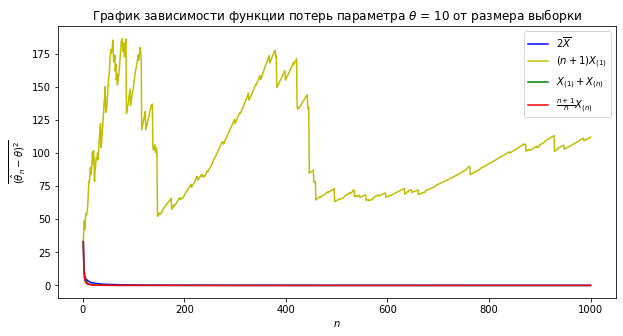

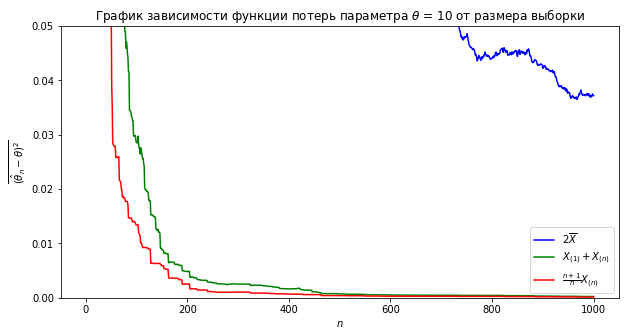

In [59]:
theta = 10
ests = estimates(theta)
makePlot(ests, theta)
makePlot(ests, theta, True)

Как видно из графиков, усредненная квадратичная функция потерь для оценки $2\overline{X}$ стремится к нулю медленее, чем остальные. Это связано с тем, что матожидание этой функции равно $\frac{\theta^2}{3n} \sim \frac{1}{n}$. Для оценки $\frac{n + 1}{n}X_{(n)}$ оно равно $\frac{\theta^2}{n (n+2)} \sim \frac{1}{n^2}$, поэтому её усредненная квадратичная функция потерь стремится к нулю быстрее.